# Exploratory Data Analysis (EDA) and Feature Engineering
This notebook contains the exploratory data analysis and feature engineering steps for the world population dataset.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore
from statsmodels.tsa.stattools import grangercausalitytests

In [94]:
# Load the dataset
file_path = '../data/processed/data_world_imputed.csv'
data = pd.read_csv(file_path,parse_dates=['Year'],index_col='Year')
data.head()

,AG.LND.AGRI.ZS,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,ER.H2O.INTR.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,SE.ADT.LITR.ZS,SE.PRM.ENRL,SE.PRM.ENRL.TC.ZS,...,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.1564.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL.IN.ZS
Year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,35.879317,49.296068,73.351057,28.528475,13632.001963,1.364504e+12,450.106029,65.586548,401658848.0,28.105,...,31.908511,17.234125,50.894331,4.695876,57.609554,74.564099,1.350895,3.031517e+09,66.397484,33.602516
1961-01-01,35.879317,49.296068,73.351057,28.528475,13632.001963,1.439319e+12,468.456801,65.586548,401658848.0,28.105,...,31.165497,14.583294,52.846477,4.575612,57.514766,74.847445,1.350895,3.072470e+09,65.910435,34.089565
1962-01-01,35.952470,49.296068,73.351057,29.033819,13395.564612,1.542845e+12,493.411159,65.586548,401658848.0,28.105,...,35.103391,13.616499,55.208783,5.035190,57.396796,75.251960,1.771351,3.126894e+09,65.478880,34.521120
1963-01-01,36.035383,49.296068,73.351057,29.651986,13109.723539,1.664977e+12,521.369208,65.586548,401658848.0,28.105,...,36.274663,13.459129,55.542430,5.323440,57.170929,76.020578,2.129136,3.193470e+09,65.102013,34.897987
1964-01-01,36.117043,49.296068,73.351057,30.274183,12834.164741,1.827785e+12,560.587725,65.586548,401658848.0,28.105,...,35.131852,13.529275,56.034953,5.141431,56.978716,76.684358,2.098330,3.260480e+09,64.717882,35.282118


In [95]:
# Generate summary statistics
summary_statistics = data.describe()
summary_statistics

,AG.LND.AGRI.ZS,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,ER.H2O.INTR.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,SE.ADT.LITR.ZS,SE.PRM.ENRL,SE.PRM.ENRL.TC.ZS,...,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.1564.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL.IN.ZS
count,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,61.000000,6.100000e+01,61.000000,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,61.000000
mean,37.172834,52.451734,77.085927,44.471484,8564.261622,3.023342e+13,4730.546782,74.713898,5.734634e+08,26.471746,...,25.664130,9.905745,64.490771,3.443660,60.981538,65.815167,1.588752,5.325349e+09,56.314292,43.685708
std,0.733006,5.982653,5.635893,8.856847,2388.011286,2.801190e+13,3614.792409,7.969729,1.165689e+08,1.741034,...,5.249030,2.141791,5.729148,0.925490,3.146621,8.344295,0.330890,1.451511e+09,6.643229,6.643229
min,35.879317,49.296068,73.351057,28.528475,5499.282171,1.364504e+12,450.106029,65.586548,4.016588e+08,23.105960,...,17.225600,7.472199,50.894331,2.299689,56.832243,54.664765,1.014463,3.031517e+09,43.935269,33.602516
25%,36.762648,49.296068,73.351057,37.791719,6607.283615,5.990674e+12,1471.888359,65.586548,4.787472e+08,25.248550,...,20.611341,8.153805,60.166149,2.603162,57.514766,56.923882,1.263375,4.070060e+09,50.911960,37.649413
50%,37.026447,49.296068,73.351057,45.036397,7918.812433,2.282261e+13,4311.441716,74.605766,5.767477e+08,26.551490,...,26.052895,9.261374,65.188507,3.305448,60.975415,65.561399,1.628024,5.293498e+09,56.996091,43.003909
75%,37.496551,52.338751,80.821135,50.510912,10196.991711,4.776032e+13,7288.550579,82.438942,6.806504e+08,28.105000,...,29.115369,11.307202,69.198812,4.079910,64.395352,74.847445,1.788548,6.552787e+09,62.350587,49.088040
max,38.973290,71.279020,90.485404,60.191714,13632.001963,8.794557e+13,11358.478658,86.711510,7.511644e+08,28.730860,...,36.274663,17.234125,72.979020,5.323440,65.334837,77.206540,2.129136,7.821272e+09,66.397484,56.064731


### Plot the Population and Other Indicators

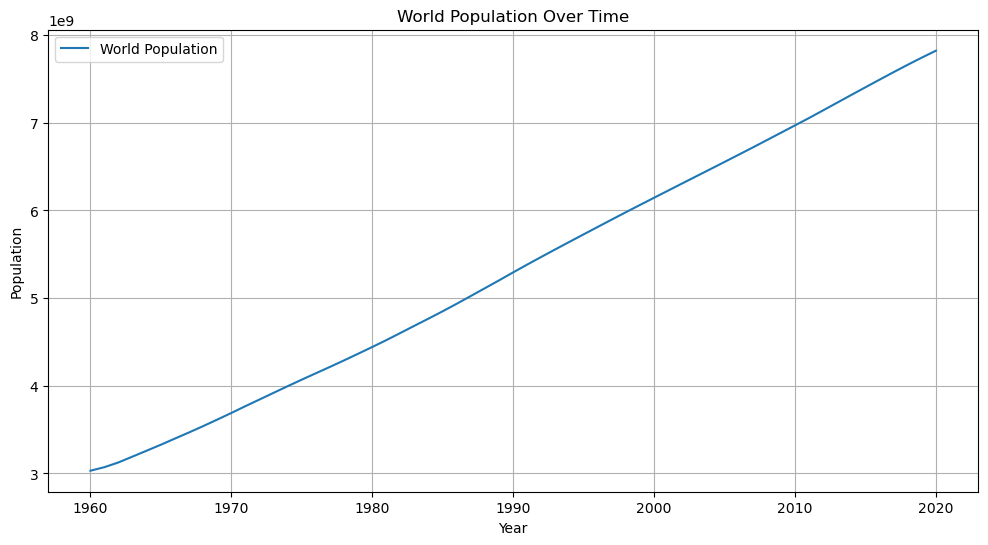

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['SP.POP.TOTL'], label='World Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population Over Time')
plt.legend()
plt.grid(True)
plt.show()

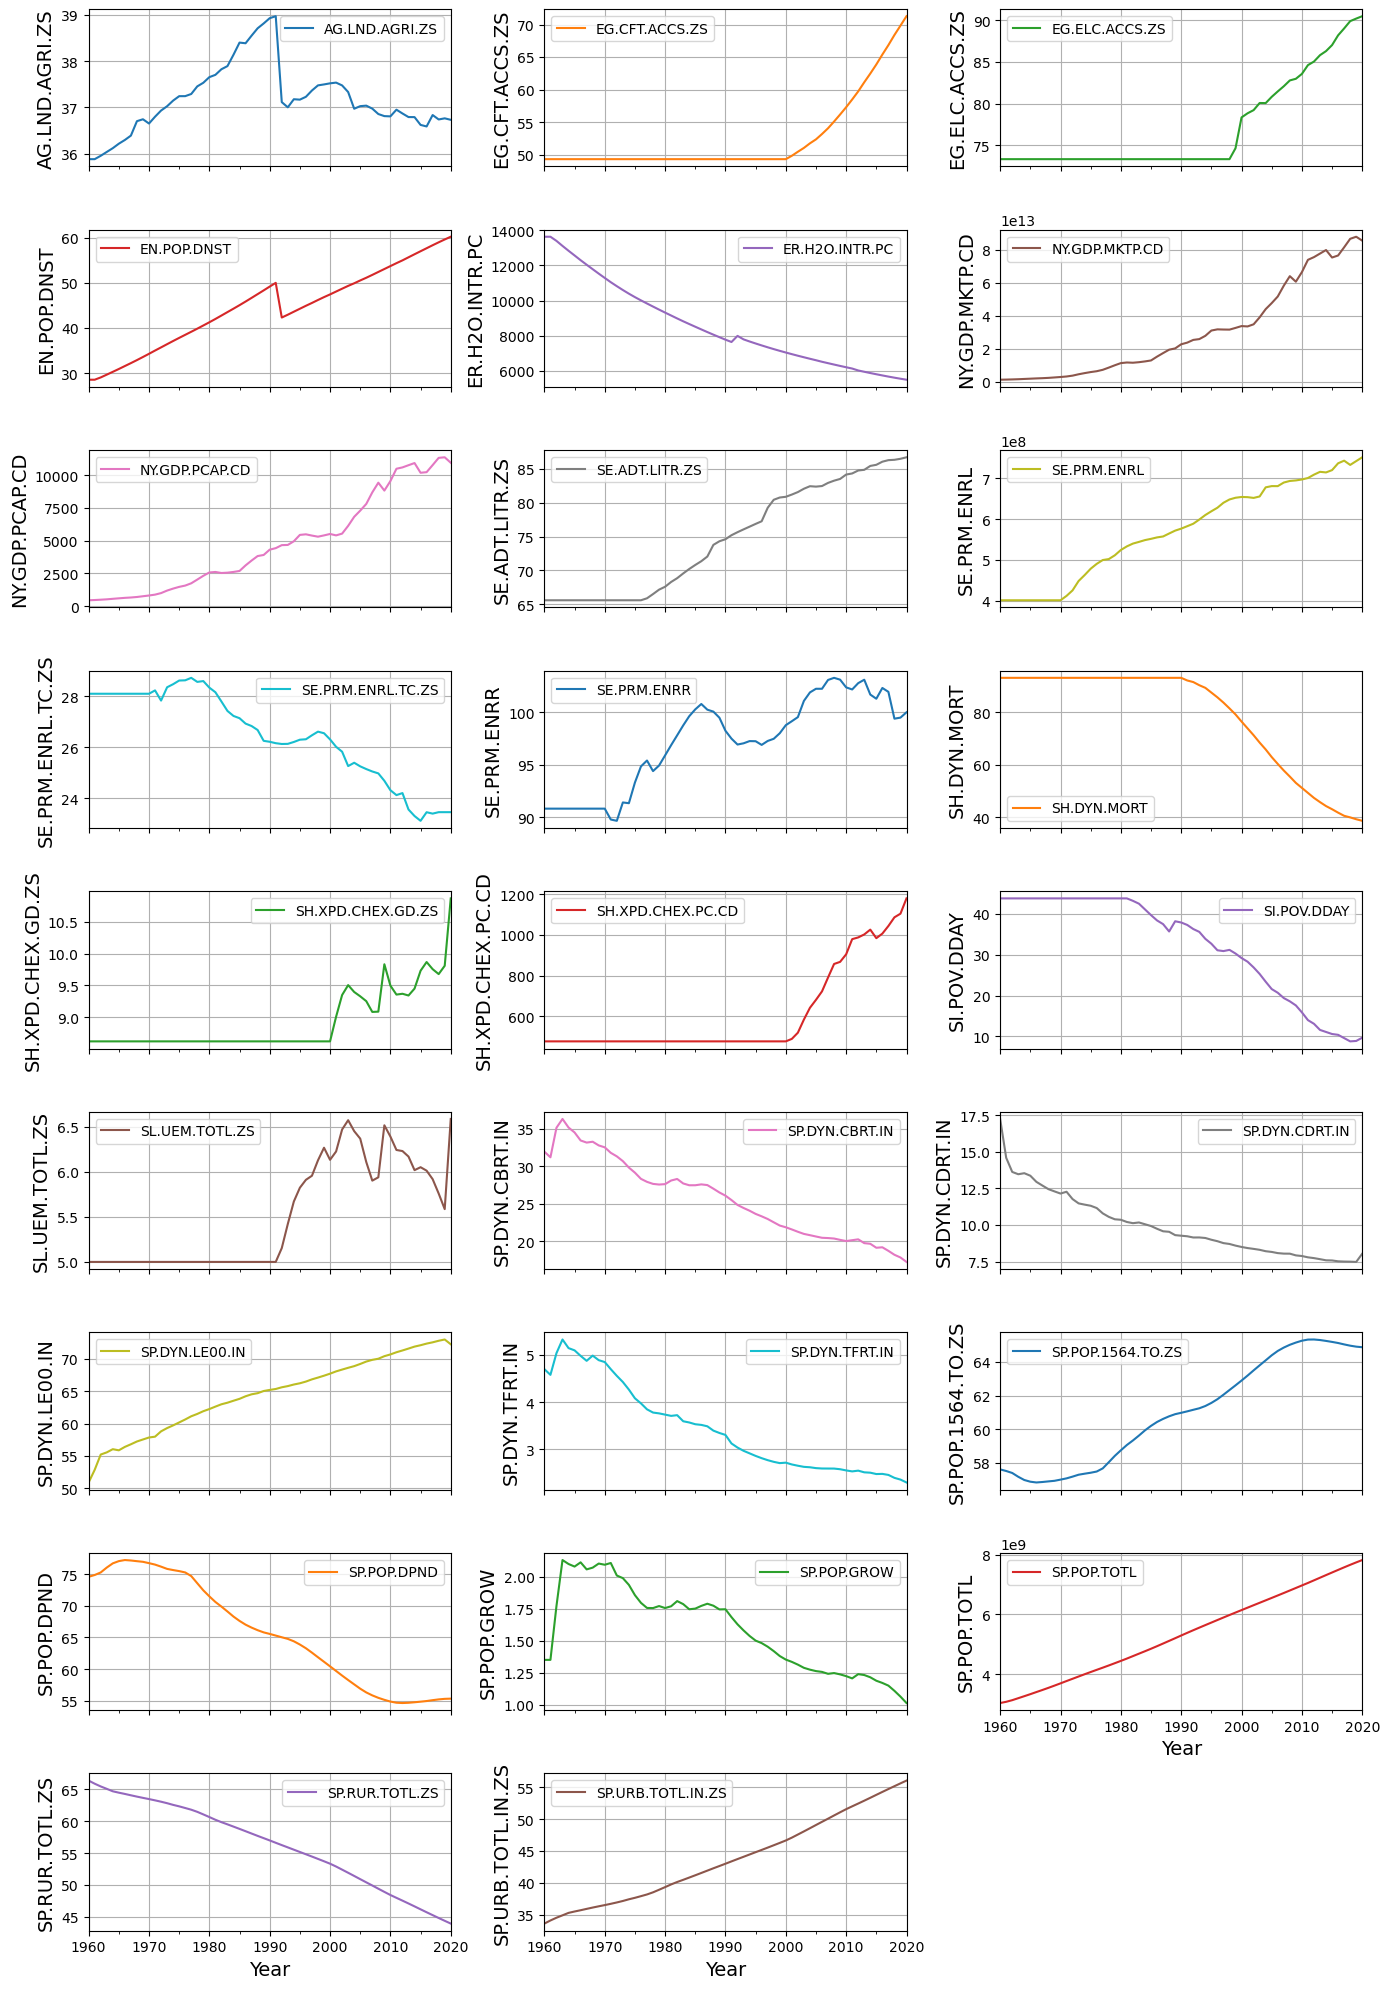

In [97]:
# Plotting the data with subplots for better readability
axes = data.plot(subplots=True, figsize=(14, 20), layout=(9, 3), sharex=True)

# Adjusting the layout and titles for better readability
for ax, column in zip(axes.flatten(), data.columns):
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel(column, fontsize=14)
    ax.grid(True)

plt.tight_layout()
plt.show()

### Check for Trends and Seasonality

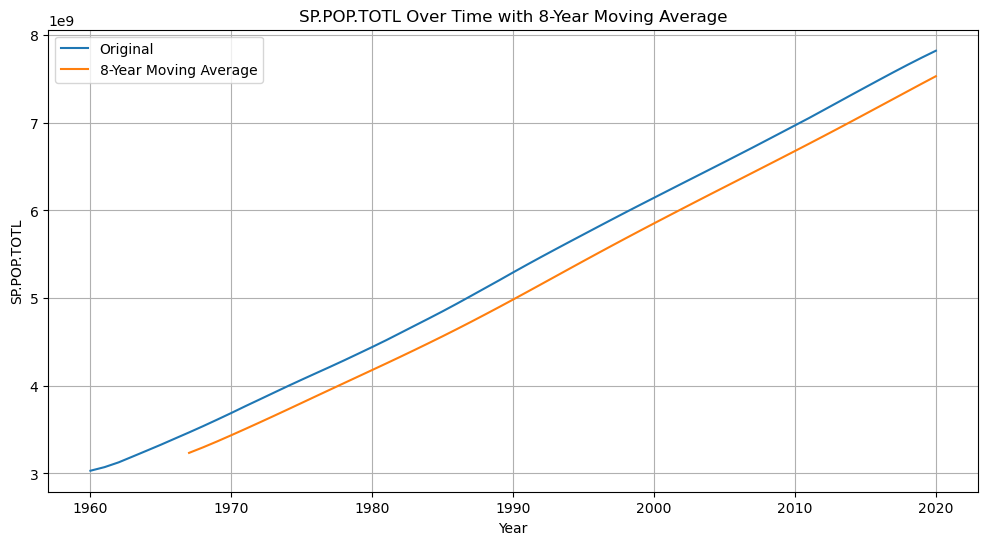

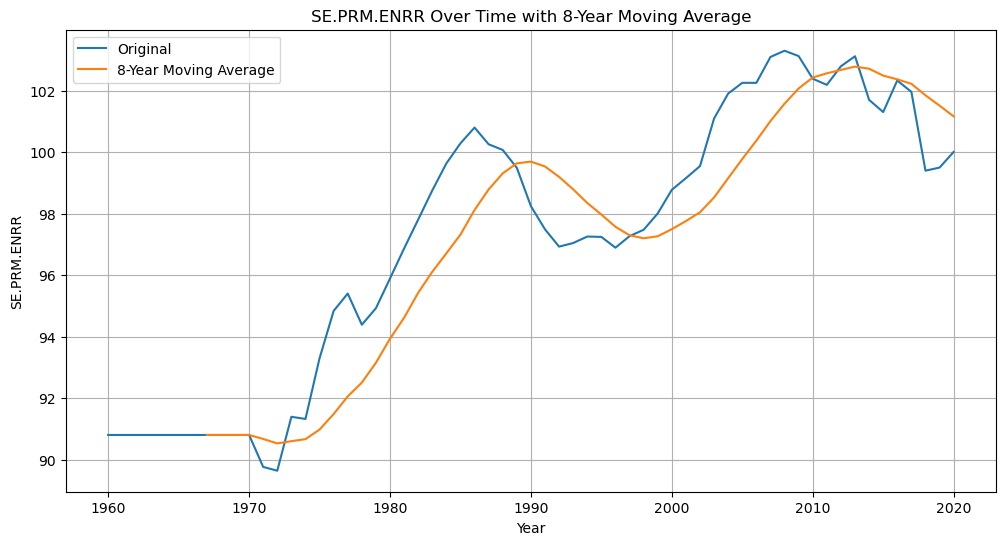

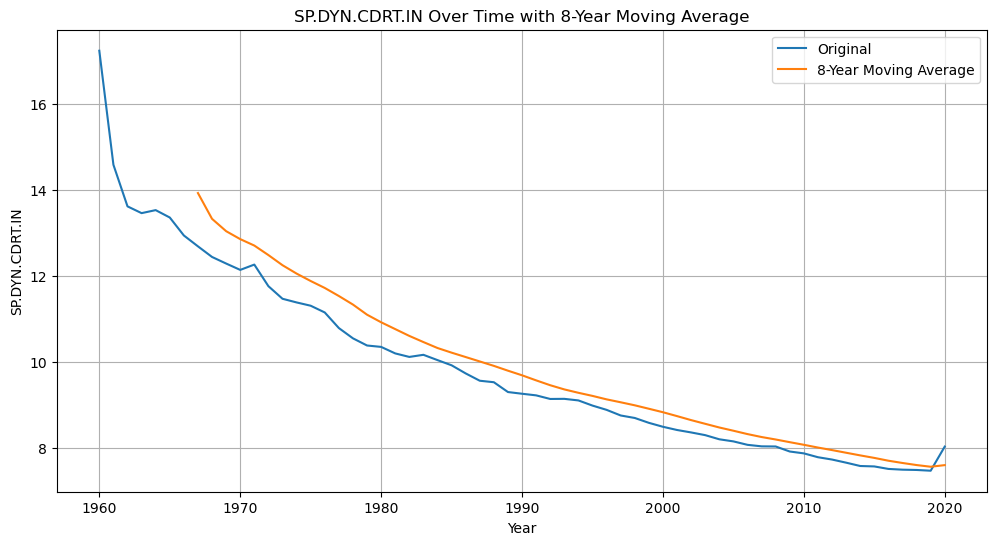

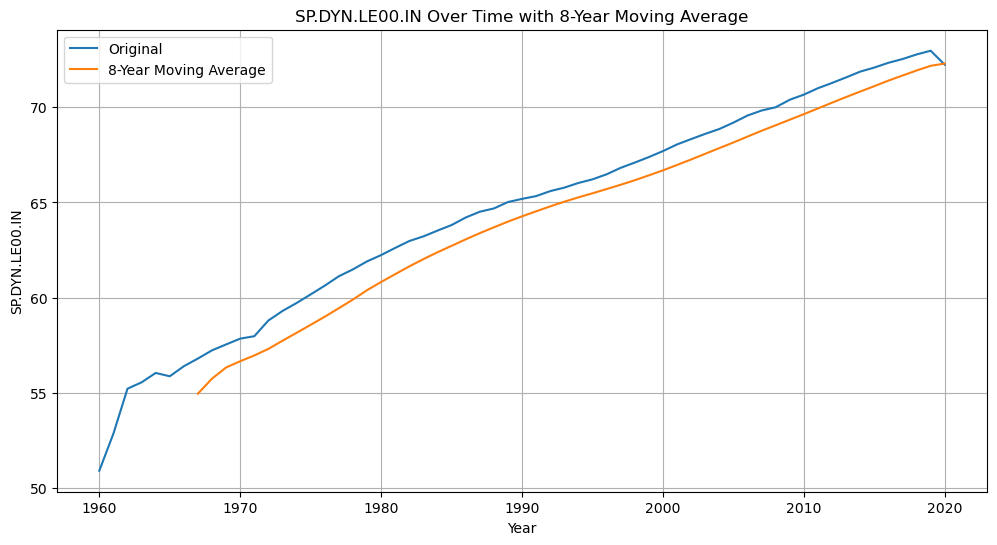

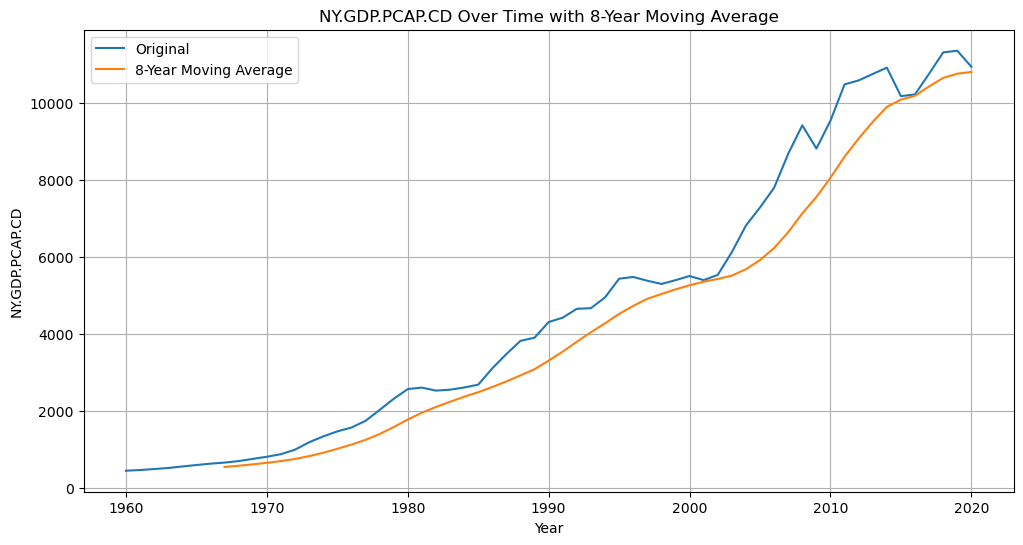

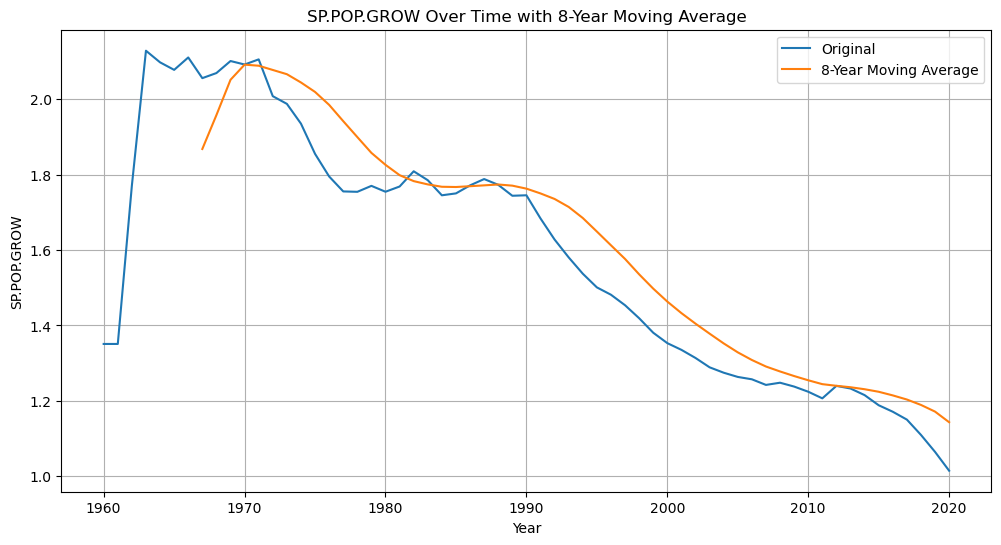

In [99]:
def plot_moving_average(data, column, window_size):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[column], label='Original')
    plt.plot(data.index, data[column].rolling(window=window_size).mean(), label=f'{window_size}-Year Moving Average')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'{column} Over Time with {window_size}-Year Moving Average')
    plt.legend()
    plt.grid(True)
    plt.show()

for i in ['SP.POP.TOTL','SE.PRM.ENRR', 'SP.DYN.CDRT.IN', 'SP.DYN.LE00.IN', 'NY.GDP.PCAP.CD', 'SP.POP.GROW']:
    plot_moving_average(data,i,8) 
# Plot moving averages and trend lines


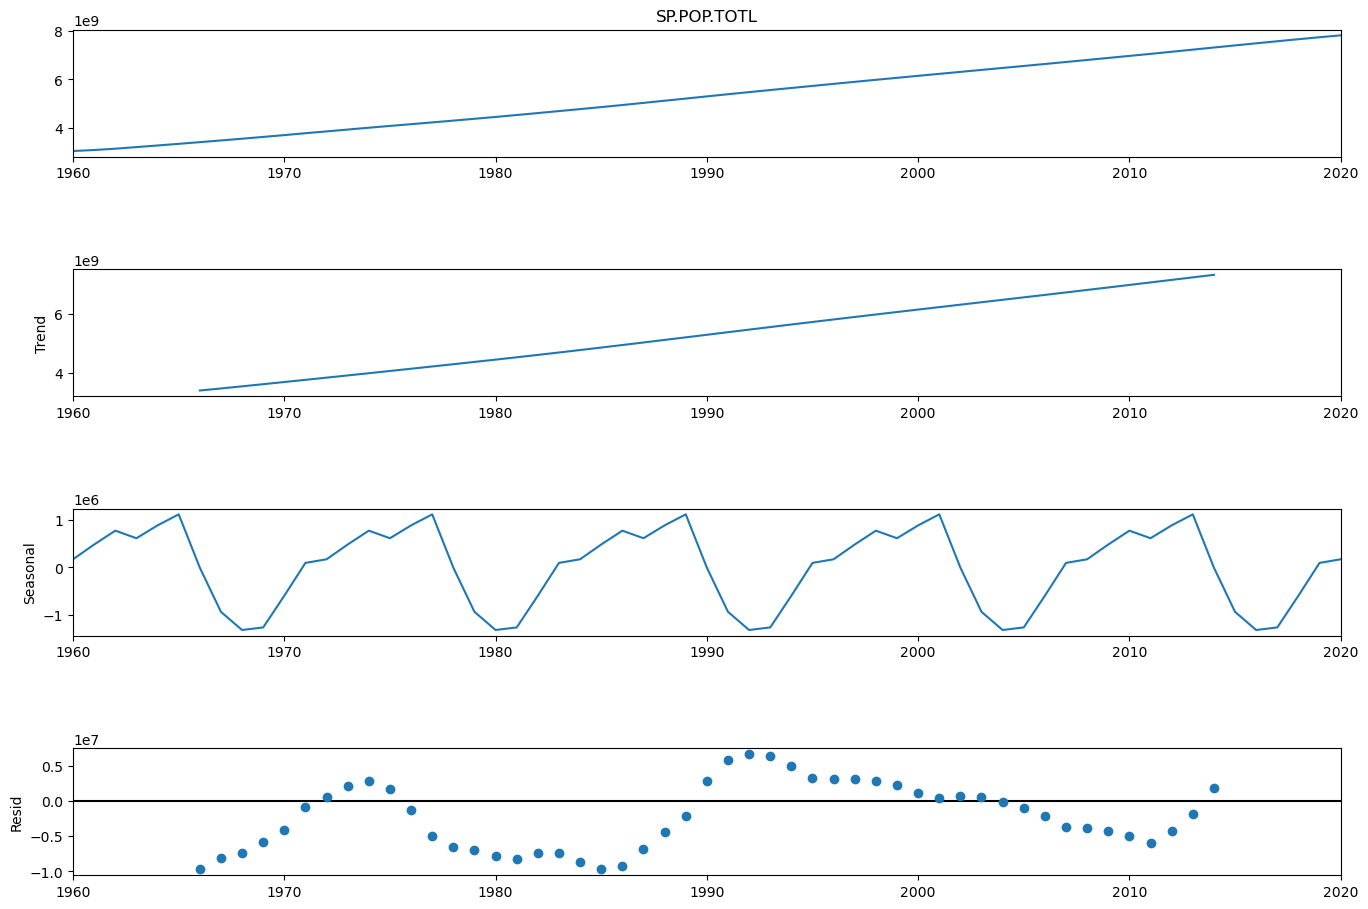

In [100]:
# Decompose the population time series
decomposition = seasonal_decompose(data['SP.POP.TOTL'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

### Explore Correlations

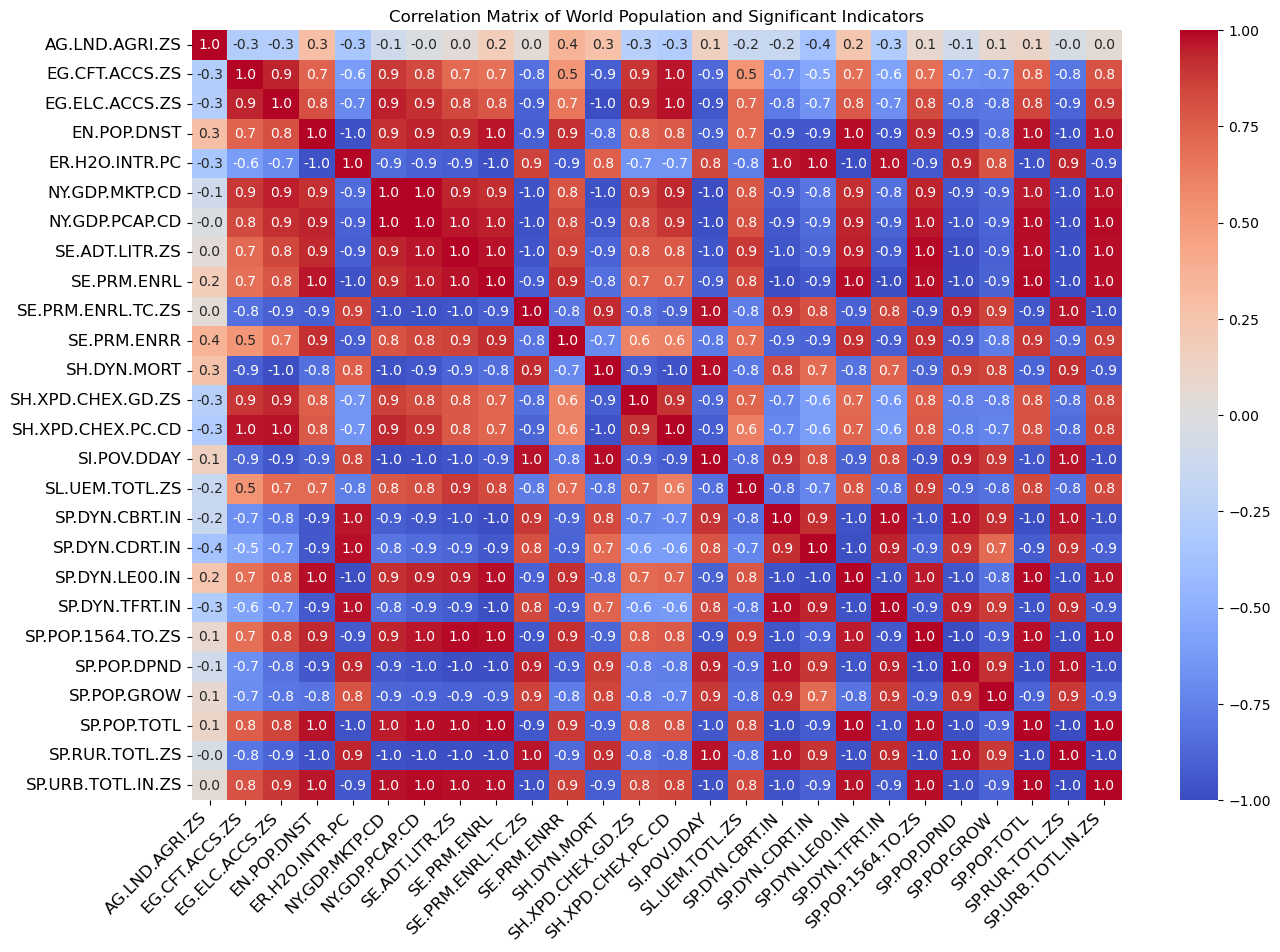

In [101]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Matrix of World Population and Significant Indicators')
plt.show()

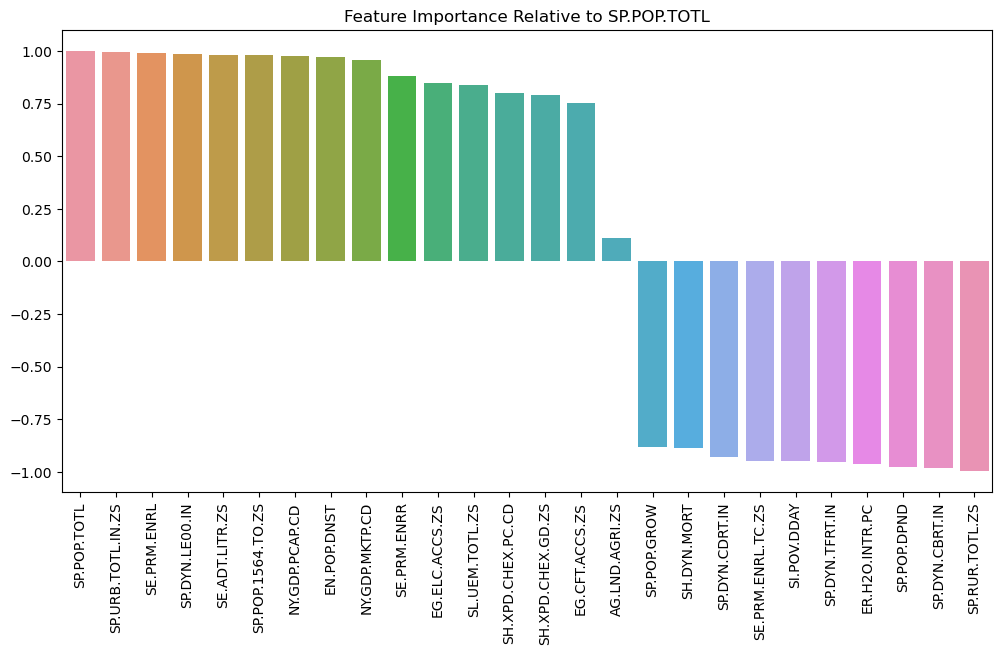

In [102]:
def plot_feature_importance(correlation_matrix, target_column):
    correlations = correlation_matrix[target_column].sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=correlations.index, y=correlations.values)
    plt.xticks(rotation=90)
    plt.title(f'Feature Importance Relative to {target_column}')
    plt.show()

# Feature importance relative to total population
plot_feature_importance(correlation_matrix, 'SP.POP.TOTL')

### Granger causality tests for significant indicators

In [103]:
def granger_causality_test(df, target, feature, max_lag=5):
    result = grangercausalitytests(df[[target, feature]], maxlag=max_lag, verbose=False)
    print(f"Granger Causality Test Results for {feature}:")
    for key in result:
        test_stat = result[key][0]['ssr_ftest']
        print(f"Lag {key}: F-statistic = {test_stat[0]:.4f}, p-value = {test_stat[1]:.4f}")
    print("\n")

# Run the causality tests
for indicator in data.columns:
    granger_causality_test(data, 'SP.POP.TOTL', indicator)

Granger Causality Test Results for AG.LND.AGRI.ZS:
Lag 1: F-statistic = 65.3120, p-value = 0.0000
Lag 2: F-statistic = 6.3172, p-value = 0.0034
Lag 3: F-statistic = 2.3948, p-value = 0.0790
Lag 4: F-statistic = 0.5942, p-value = 0.6685
Lag 5: F-statistic = 1.2065, p-value = 0.3216


Granger Causality Test Results for EG.CFT.ACCS.ZS:
Lag 1: F-statistic = 15.3077, p-value = 0.0002
Lag 2: F-statistic = 2.1724, p-value = 0.1238
Lag 3: F-statistic = 1.2186, p-value = 0.3125
Lag 4: F-statistic = 2.1697, p-value = 0.0866
Lag 5: F-statistic = 1.4189, p-value = 0.2358


Granger Causality Test Results for EG.ELC.ACCS.ZS:
Lag 1: F-statistic = 33.2526, p-value = 0.0000
Lag 2: F-statistic = 2.2937, p-value = 0.1106
Lag 3: F-statistic = 1.0678, p-value = 0.3710
Lag 4: F-statistic = 0.1796, p-value = 0.9479
Lag 5: F-statistic = 0.5162, p-value = 0.7626


Granger Causality Test Results for EN.POP.DNST:
Lag 1: F-statistic = 22.3406, p-value = 0.0000
Lag 2: F-statistic = 2.5450, p-value = 0.0879
Lag 3: 

Here is the list of selected features based on the Granger causality test and the correlation matrix:

Selected Features
Based on the above criteria, the following indicators are selected:

AG.LND.AGRI.ZS: Sign in Granger test at Lag 1, pos corr with SP.POP.TOTL.

EG.CFT.ACCS.ZS: Sign in Granger test at Lag 1, pos corr with SP.POP.TOTL.

EG.ELC.ACCS.ZS: Signif in Granger test at Lag 1, pos corr with SP.POP.TOTL.

EN.POP.DNST: Signif in Granger test at Lag 1, pos corr with SP.POP.TOTL.

ER.H2O.INTR.PC: Signif in Granger test at Lag 1, pos corr with SP.POP.TOTL.

NY.GDP.MKTP.CD: Signif in Granger test at Lag 1, pos corr with SP.POP.TOTL.

NY.GDP.PCAP.CD: Signif in Granger test at Lag 1, pos corr with SP.POP.TOTL.

SE.ADT.LITR.ZS: Signif in Granger test at multiple lags, pos corr with SP.POP.TOTL.

SP.DYN.LE00.IN: Signif in Granger test at multiple lags, pos corr with SP.POP.TOTL.

SP.DYN.TFRT.IN: Signif in Granger test at multiple lags, pos corr with SP.POP.TOTL.

SP.POP.1564.TO.ZS: Signif in Granger test at multiple lags, pos corr with SP.POP.TOTL.

SP.POP.DPND: Signif in Granger test at multiple lags, pos corr with SP.POP.TOTL.

SP.POP.GROW: Signif in Granger test at multiple lags, pos corr with SP.POP.TOTL.

SP.RUR.TOTL.ZS: Signif in Granger test at multiple lags, pos corr with SP.POP.TOTL.

SP.URB.TOTL.IN.ZS: Signif in Granger test at multiple lags, pos corr with SP.POP.TOTL.


### Feature Engineering

In [105]:
# Create lagged features for selected indicators

data['GDP_per_Capita_lag1'] = data['NY.GDP.PCAP.CD'].shift(1)
data['Life_Expectancy_lag1'] = data['SP.DYN.LE00.IN'].shift(1)
data['Crude_Birth_Rate_lag1'] = data['SP.DYN.CBRT.IN'].shift(1)
data['Pr_school_enrollment_lag1'] = data['SE.PRM.ENRR'].shift(1)
data['Mortality_rate_lag1'] = data['SP.DYN.CDRT.IN'].shift(1)
data['Population_growth_rate_lag1'] = data['SP.POP.GROW'].shift(1)

# Drop rows with NaN values created by shifting
data = data.dropna()

# Display the first few rows to verify
data[['GDP_per_Capita_lag1', 'Life_Expectancy_lag1', 'Crude_Birth_Rate_lag1','Pr_school_enrollment_lag1','Mortality_rate_lag1','Population_growth_rate_lag1']].head()

,GDP_per_Capita_lag1,Life_Expectancy_lag1,Crude_Birth_Rate_lag1,Pr_school_enrollment_lag1,Mortality_rate_lag1,Population_growth_rate_lag1
Year,,,,,,
1961-01-01,450.106029,50.894331,31.908511,90.8022,17.234125,1.350895
1962-01-01,468.456801,52.846477,31.165497,90.8022,14.583294,1.350895
1963-01-01,493.411159,55.208783,35.103391,90.8022,13.616499,1.771351
1964-01-01,521.369208,55.542430,36.274663,90.8022,13.459129,2.129136
1965-01-01,560.587725,56.034953,35.131852,90.8022,13.529275,2.098330


In [106]:
data.to_csv('../data/processed/data_fe.csv')